In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
%matplotlib inline
import matplotlib.pyplot as plt
from fastai.vision import *
import torch
from torchsummary import summary
torch.cuda.set_device(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)

from models.custom_resnet import *
from utils import _get_accuracy

In [2]:
def check(model_name, dataset) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(path, train = 'train', valid = val, bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/' + model_name + '_classifier/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    stagewise_acc = _get_accuracy(data.valid_dl, net)
    
    savename = '../saved_models/' + dataset + '/' + model_name + '_no_teacher/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('no_teacher : ', _get_accuracy(data.valid_dl, net))
    noteacher_acc = _get_accuracy(data.valid_dl, net)
    
    return noteacher_acc, stagewise_acc

In [9]:
print(check('resnet10', 'imagenette'))
print(check('resnet14', 'imagenette'))
print(check('resnet18', 'imagenette'))
print(check('resnet20', 'imagenette'))
print(check('resnet26', 'imagenette'))

(0.918, 0.974)
(0.912, 0.988)
(0.914, 0.988)
(0.916, 0.988)
(0.906, 0.99)


In [10]:
print(check('resnet10', 'imagewoof'))
print(check('resnet14', 'imagewoof'))
print(check('resnet18', 'imagewoof'))
print(check('resnet20', 'imagewoof'))
print(check('resnet26', 'imagewoof'))

(0.802, 0.906)
(0.786, 0.928)
(0.792, 0.924)
(0.798, 0.92)
(0.802, 0.934)


In [11]:
print(check('resnet10', 'cifar10'))
print(check('resnet14', 'cifar10'))
print(check('resnet18', 'cifar10'))
print(check('resnet20', 'cifar10'))
print(check('resnet26', 'cifar10'))

(0.7788, 0.8475)
(0.775, 0.8497)
(0.7735, 0.8599)
(0.7808, 0.8646)
(0.783, 0.8662)


In [3]:
def check_ld(model_name, dataset) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    new_path = path/'new'
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(new_path, train = 'train', valid = 'val', test = 'test', bs = 64, size = sz, ds_tfms = tfms).normalize(stats)
    
    if model_name == 'resnet10' :
        net = resnet10(pretrained = False, progress = False)
    elif model_name == 'resnet14' : 
        net = resnet14(pretrained = False, progress = False)
    elif model_name == 'resnet18' :
        net = resnet18(pretrained = False, progress = False)
    elif model_name == 'resnet20' :
        net = resnet20(pretrained = False, progress = False)
    elif model_name == 'resnet26' :
        net = resnet26(pretrained = False, progress = False)
    savename = '../saved_models/' + dataset + '/less_data/' + model_name + '_classifier/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('stagewise : ', _get_accuracy(data.valid_dl, net))
    ld_stagewise_acc = _get_accuracy(data.valid_dl, net)
    
    savename = '../saved_models/' + dataset + '/less_data/' + model_name + '_no_teacher/model0.pt'
    net.load_state_dict(torch.load(savename, map_location = 'cpu'))
    net.cuda()
#     print('no_teacher : ', _get_accuracy(data.valid_dl, net))
    ld_noteacher_acc = _get_accuracy(data.valid_dl, net)
    
    return ld_noteacher_acc, ld_stagewise_acc

In [13]:
print(check_ld('resnet10', 'imagenette'))
print(check_ld('resnet14', 'imagenette'))
print(check_ld('resnet18', 'imagenette'))
print(check_ld('resnet20', 'imagenette'))
print(check_ld('resnet26', 'imagenette'))

(0.848, 0.954)
(0.85, 0.95)
(0.854, 0.956)
(0.85, 0.958)
(0.832, 0.96)


In [14]:
print(check_ld('resnet10', 'imagewoof'))
print(check_ld('resnet14', 'imagewoof'))
print(check_ld('resnet18', 'imagewoof'))
print(check_ld('resnet20', 'imagewoof'))
print(check_ld('resnet26', 'imagewoof'))

(0.632, 0.858)
(0.616, 0.89)
(0.602, 0.89)
(0.6, 0.876)
(0.588, 0.898)


In [17]:
print(check_ld('resnet10', 'cifar10'))
print(check_ld('resnet14', 'cifar10'))
print(check_ld('resnet18', 'cifar10'))
print(check_ld('resnet20', 'cifar10'))
print(check_ld('resnet26', 'cifar10'))

(0.6635, 0.8159)
(0.6489, 0.8255)
(0.6466, 0.8328)
(0.652, 0.8324)
(0.6409, 0.8364)


In [4]:
def check_teacher(model_name, dataset) :
    if dataset == 'imagenette' : 
        path = untar_data(URLs.IMAGENETTE)
    elif dataset == 'cifar10' : 
        path = untar_data(URLs.CIFAR)
    elif dataset == 'imagewoof' : 
        path = untar_data(URLs.IMAGEWOOF)
    
    val = 'val'
    sz = 224
    stats = imagenet_stats

    tfms = get_transforms(do_flip=False)
    load_name = dataset
    if dataset == 'cifar10' : 
        val = 'test'
        sz = 32
        stats = cifar_stats
        load_name = dataset[ : -2]

    data = ImageDataBunch.from_folder(path, train = 'train', valid = val, bs = 64, size = sz, ds_tfms = tfms).normalize(stats)

    if model_name == 'resnet34' :
        learn = cnn_learner(data, models.resnet34, metrics = accuracy)
        learn = learn.load('resnet34_' + load_name + '_bs64')
        learn.freeze()
        net = learn.model
    
    net = net.cuda()
    return(_get_accuracy(data.valid_dl, net))

In [16]:
print(check_teacher('resnet34', 'imagenette'))
print(check_teacher('resnet34', 'imagewoof'))
print(check_teacher('resnet34', 'cifar10'))

0.992
0.914
0.8751


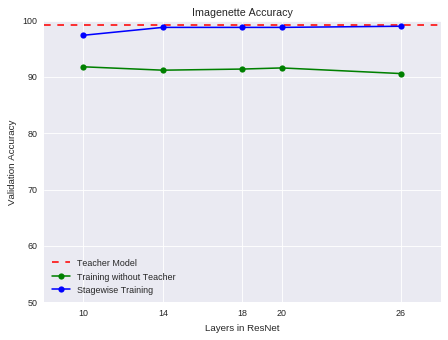

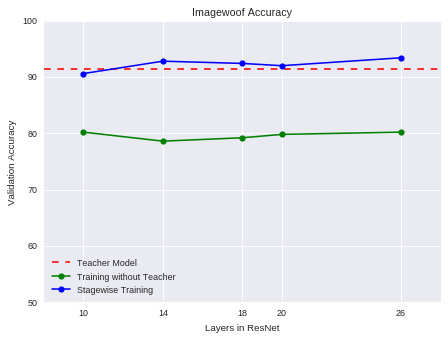

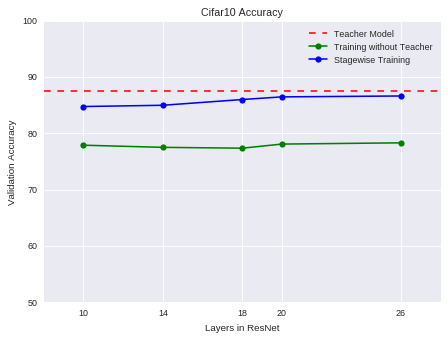

In [53]:
for dataset in ['imagenette', 'imagewoof', 'cifar10'] :
    imagenette_acc_stagewise = list()
    imagenette_acc_noteacher = list()
    for model in ['resnet10', 'resnet14', 'resnet18', 'resnet20', 'resnet26'] :
        noteacher_acc, stagewise_acc = check(model, dataset)
        imagenette_acc_noteacher.append(noteacher_acc * 100)
        imagenette_acc_stagewise.append(stagewise_acc * 100)

    teacher_acc = check_teacher('resnet34', dataset) * 100

    layers = [10, 14, 18, 20, 26]
    
    plt.style.use('seaborn-paper')
    fig, ax = plt.subplots()
    title_ = dataset[0].upper() + dataset[1 : ] + ' Accuracy'
    ax.set(xlim = [8, 28], ylim = [50, 100], xlabel = 'Layers in ResNet', ylabel = 'Validation Accuracy', title = title_)
    ax.axhline(teacher_acc, ls = '--', color = 'r', label = 'Teacher Model')
    ax.plot(layers, imagenette_acc_noteacher, 'go-', label = 'Training without Teacher')
    ax.plot(layers, imagenette_acc_stagewise, 'bo-', label = 'Stagewise Training')
    plt.xticks(layers)
    ax.legend(loc = 'best')
    plt.show()

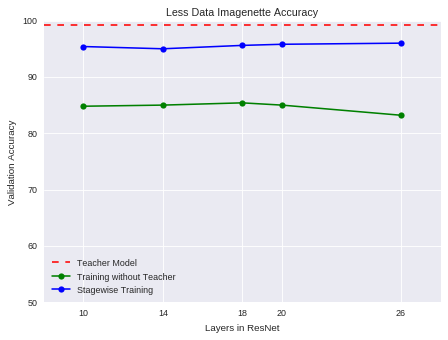

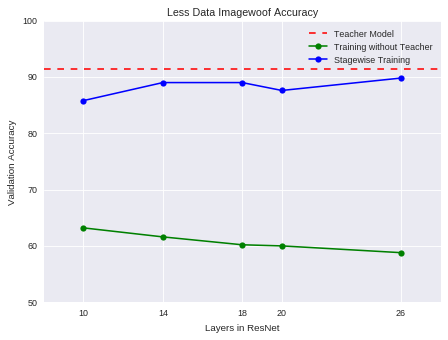

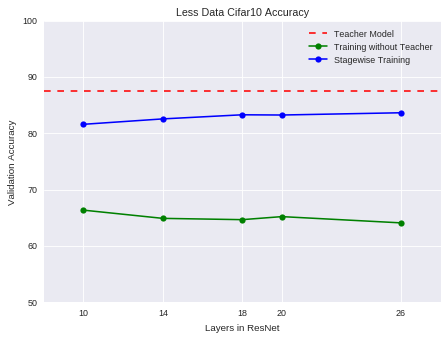

In [54]:
for dataset in ['imagenette', 'imagewoof', 'cifar10'] :
    imagenette_acc_stagewise = list()
    imagenette_acc_noteacher = list()
    for model in ['resnet10', 'resnet14', 'resnet18', 'resnet20', 'resnet26'] :
        noteacher_acc, stagewise_acc = check_ld(model, dataset)
        imagenette_acc_noteacher.append(noteacher_acc * 100)
        imagenette_acc_stagewise.append(stagewise_acc * 100)

    teacher_acc = check_teacher('resnet34', dataset) * 100

    layers = [10, 14, 18, 20, 26]
    
    plt.style.use('seaborn-paper')
    fig, ax = plt.subplots()
    title_ = 'Less Data ' + dataset[0].upper() + dataset[1 : ] + ' Accuracy'
    ax.set(xlim = [8, 28], ylim = [50, 100], xlabel = 'Layers in ResNet', ylabel = 'Validation Accuracy', title = title_)
    ax.axhline(teacher_acc, ls = '--', color = 'r', label = 'Teacher Model')
    ax.plot(layers, imagenette_acc_noteacher, 'go-', label = 'Training without Teacher')
    ax.plot(layers, imagenette_acc_stagewise, 'bo-', label = 'Stagewise Training')
    plt.xticks(layers)
    ax.legend(loc = 'best')
    plt.show()